In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, roc_curve, auc,roc_auc_score,plot_roc_curve
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_columns = None

In [2]:
data = pd.read_csv('medical_clean.csv')

In [3]:
data

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,item1,item2,item3,item4,item5,item6,item7,item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93000,Divorced,Male,No,19.14147,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.58577,3726.70286,17939.40342,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99000,Married,Female,No,18.94035,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.12956,4193.19046,17612.99812,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14000,Widowed,Female,No,18.05751,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.77218,2434.23422,17505.19246,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49000,Married,Male,No,16.57686,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.71488,2127.83042,12993.43735,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56000,Widowed,Female,No,17.43907,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.25481,2113.07327,3716.52579,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",2,25,45967.61000,Widowed,Male,No,16.98086,4,2,1,No,Emergency Admission,Yes,No,Medium,No,No,No,No,No,Yes,No,Yes,No,Intravenous,51.56122,6850.94200,8927.64200,3,2,2,3,4,3,4,2
9996,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4,87,14983.02000,Widowed,Male,Yes,18.17702,5,0,0,No,Elective Admission,Yes,No,Medium,Yes,Yes,Yes,No,No,No,No,No,Yes,CT Scan,68.66824,7741.69000,28507.15000,3,3,4,2,5,3,4,4
9997,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3,45,65917.81000,Separated,Female,Yes,17.12907,4,2,0,Yes,Elective Admission,Yes,No,High,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous,70.15418,8276.48100,15281.21000,3,3,3,4,4,2,3,2
9998,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,271,Rural,America/Denver,Outdoor activities/education manager,3,43,29702.32000,Divorced,Male,Yes,19.91043,5,2,1,No,Emergency Admission,No,No,Medium,Yes,No,No,No,Yes,No,No,No,No,Blood Work,63.35690,7644.48300,7781.67800,5,5,3,4,4,3,4,3


### Part I. Research Question

### 1.

Readmissions can be a huge problem for hospital systems. According to the data dictionary, Readmissions can result in fines to the health system. The question is; Can potential readmissions be predicted by a group of independent variables?

### 2.

The goal of this analysis will be, given a set of training data points, predict whether or not a patient will be readmitted to the hospital. 

### Part II. Method Justification

### B

### 1.

KNN or k-nearest neighbor is an algorithm that can be used to solve both regression and classificiation problems. KNN uses the idea that data points that are similar will exist close to each other. The idea that similar data points are at a closer distance to each other and thus should be grouped together is at the core of the KNN algorithm. This grouping is assisted by the K variable. K essentially says that a data point and it's K value neighbors should be grouped together. 

### 2.

KNN is interesting in the fact that it makes no assumptions on the data it is using other than they must all exist in the same feature space. (Thirumuruganathan, 2010)

### 3.

Listed below are the utilized packages and how they assist in making the analysis possible.
- Pandas - Pandas allows a wide varitey of data analytics processes, it is the main library used to import files such as csv's into a format that Python can easily handle. It is also crucial in the creation of additional dataframes.
- Seaborn - Seaborn is a visualization library that makes beautiful data visualizations.
- MatPlotLib - MatPlotLib is the normal go to visualization library in Python.
- SkLearn - SKLearn is the data workhorse, it contains a variety of easy to use algorithms (such as KNN), it also is used to split a data set into test and training data. 

### Part III. Data Preparation

### C

### 1.

One key preprocessing task is to factorize the dependant variables. This is easy to accomplish using Pandas and Python's lambda functions. Factorizing the variables takes a variable such as Gender and converts it possible responses to integers. For the example of gender, Male would become 0, Female would become 1, and so on. This makes the algorithm have less to process when it comes to making sense of what each variable represents. The code in Section 3 below shows the process. First, unused columns are removed, then columns whose dtype is object are selected and factorized.

### 2.

In [4]:
clean_data = data.drop(columns=['Area','CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng','Population','TimeZone','Job','item1','item2','item3','item4','item5','item6','item7','item8'])

In [5]:
clean_data

,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,1,53,86575.93000,Divorced,Male,No,19.14147,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.58577,3726.70286,17939.40342
1,3,51,46805.99000,Married,Female,No,18.94035,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.12956,4193.19046,17612.99812
2,3,53,14370.14000,Widowed,Female,No,18.05751,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.77218,2434.23422,17505.19246
3,0,78,39741.49000,Married,Male,No,16.57686,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.71488,2127.83042,12993.43735
4,1,22,1209.56000,Widowed,Female,No,17.43907,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.25481,2113.07327,3716.52579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,25,45967.61000,Widowed,Male,No,16.98086,4,2,1,No,Emergency Admission,Yes,No,Medium,No,No,No,No,No,Yes,No,Yes,No,Intravenous,51.56122,6850.94200,8927.64200
9996,4,87,14983.02000,Widowed,Male,Yes,18.17702,5,0,0,No,Elective Admission,Yes,No,Medium,Yes,Yes,Yes,No,No,No,No,No,Yes,CT Scan,68.66824,7741.69000,28507.15000
9997,3,45,65917.81000,Separated,Female,Yes,17.12907,4,2,0,Yes,Elective Admission,Yes,No,High,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous,70.15418,8276.48100,15281.21000
9998,3,43,29702.32000,Divorced,Male,Yes,19.91043,5,2,1,No,Emergency Admission,No,No,Medium,Yes,No,No,No,Yes,No,No,No,No,Blood Work,63.35690,7644.48300,7781.67800


### Categorical Variables:
Marital  
Gender  
Soft_drink  
Initial_admin  
HighBlood  
Stroke  
Complication_risk  
Overweight  
Arthritis  
Diabetes  
Hyperlipidemia  
BackPain  
Anxiety  
Allergic_rhinitis  
Reflux_esophagitis  
Asthma  
Services  
### Continuous Variables:  
Children  
Age  
Income  
VitD_levels  
Doc_visits  
Full_meals_eaten  
vitD_supp  
Initial_days  
Total_charges  
Additional_charges

### 3.

The process of preparing the data for the problem is simple. The data has no missing or null values, so nothing must be done in that respect. The code block in Section C-2 simply removes the unneeded variables. The code block below factorizes the categorical variables as described above.

In [6]:
cat_columns = clean_data.select_dtypes(['object']).columns
clean_data[cat_columns] = clean_data[cat_columns].apply(lambda x: pd.factorize(x)[0])

### 4.

In [7]:
clean_data.to_csv('clean_data.csv')

### Part IV: Analysis

### 1.

Below the process of spliting the data into training and testing data takes place. First the independent and dependent variables are split into X and y, respectively. Then, the actual split occurs.

In [8]:
X = clean_data.drop(columns=['ReAdmis'])
y = clean_data['ReAdmis']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.25,random_state=1,stratify=y)

In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)

array([[0.3       , 0.70422535, 0.0607095 , ..., 0.89089011, 0.89172632,
        0.33066274],
       [0.3       , 0.77464789, 0.0753207 , ..., 0.92424617, 0.79153448,
        0.75562681],
       [0.4       , 0.42253521, 0.10429553, ..., 0.83517497, 0.76970654,
        0.47898073],
       ...,
       [0.1       , 0.26760563, 0.16754264, ..., 0.12109984, 0.13449115,
        0.33242225],
       [0.3       , 0.01408451, 0.26501263, ..., 0.09757319, 0.18598836,
        0.14857472],
       [0.1       , 0.94366197, 0.17741021, ..., 0.2868263 , 0.29724523,
        0.41021223]])

### 2.

The analysis technique used is the traditional KNN set up for SkLearn. The n_neighbors variable was found through trial and error until the highest accuracy was achieved with the lowest value possible. I started at n_neighbors = 1 and continued to n_neighbors = 23. At n_neighbors = 14 the perfect value was achieved the model neither got worse nor improved past that.The code block above is the scaling of our variables, scaling can be used to put all variables on an even playing field. Income would be one of the variables that would benifit from scaling, as it is larger than other variables, scaling it would set it on the same level as number of children, thus making all variables equal in the eyes of the classifier. In the code block below knn is set to the algorithm itself with the k value that was found to best fit, then the training data was fitted to the model.

### 3.

In [11]:
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

### Part V: Data Summary

### 1.

In [12]:
y_pred = knn.predict(X_test)
print("The accuracy of the model is: %s" % (accuracy_score(y_test, y_pred)*100))

The accuracy of the model is: 91.0


Accuracy can be simply defined as the number of predicitions the model got correct. This model has an accuracy score of 91%. (Classification: Accuracy | Machine Learning Crash Course)

In [13]:
probs = knn.predict_proba(X_test)

In [14]:
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print(auc)

0.9739857992258256


In [15]:
fpr, tpr, _ = roc_curve(y_test, probs)

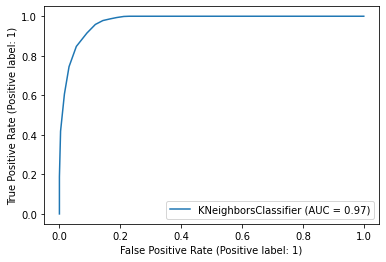

In [16]:
plot_roc_curve(knn, X_test, y_test);

The AUC or Area under curve is the models ability to distinguish between positive and negative classes. The closer a model gets to 1 with AUC the better the model is performing. This model in particular has an AUC of 0.97 or 97% meaning the model has the ability to correctly predict 97% of true positives and true negatives. (BhandariI, 2020)

### 2. 

The model is able to correctly identify 91% of readmissions based on the available training data. The fitting of the model with so many available features allows for a highly accurate model in turn. This model could be easily used in all aspects of readmission detecting and could be valuable in return.

### 3.

The biggest limitation for this problem falls on the K-nearest Neighbor classifier. KNN is notoriously slow and uses large amounts of memory, with this data set not being huge, it doesn't become a huge problem, but with my system, I noticed the memory usage becoming a problematic.

### 4.

With this classifier being as accurate as it is, it would be worth making a pipeline and feeding current patient data into it to help make informed decisions about the possibility of readmission. If a patient were to possibly be classified as a case that could be readmitted further investigation should be done.

### References

 BhandariI, A. (2020, July 20). AUC-ROC Curve in Machine Learning Clearly Explained. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/.   
   
 Google. (n.d.). Classification: Accuracy &nbsp;|&nbsp; Machine Learning Crash Course. Google. https://developers.google.com/machine-learning/crash-course/classification/accuracy. 
   
 Thirumuruganathan, S. (2010, May 18). A Detailed Introduction to K-Nearest Neighbor (KNN) Algorithm. God, Your Book Is Great !! https://saravananthirumuruganathan.wordpress.com/2010/05/17/a-detailed-introduction-to-k-nearest-neighbor-knn-algorithm/. 